Found 2898 images belonging to 29 classes.
Found 29 images belonging to 29 classes.


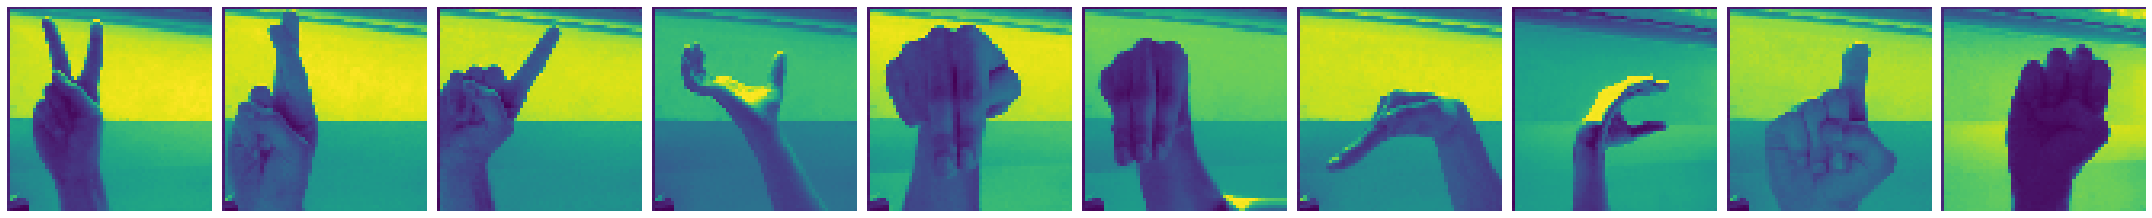

K   R   Z   space   N   M   del   C   X   E   

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import itertools
import random
import warnings
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
warnings.simplefilter(action='ignore', category=FutureWarning)


train_path = r'G:\gesture\train'
test_path = r'G:\gesture\test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(64,64), class_mode='categorical', batch_size=10,shuffle=True)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(64,64), class_mode='categorical', batch_size=10, shuffle=True)

# print(train_batches.class_indices)
imgs, labels = next(train_batches)


def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(imgs)
# print(labels)

word_dict = {0:'A',1:'B',2:'C',3:'D', 4:'E',5:'F',
             6:'G',7:'H',8:'I', 9:'J', 10:'K', 11:'L',12:'M',
            13:'N',14:'O',15:'P',16:'Q',17:'R',
             18:'S',19:'T',20:'U',21:'V',
            22:'W',23:'X',24:'Y',25:'Z',26:'del',27:'nothing',28:'space'}
for i in labels:
    print(word_dict[np.argmax(i)], end='   ')


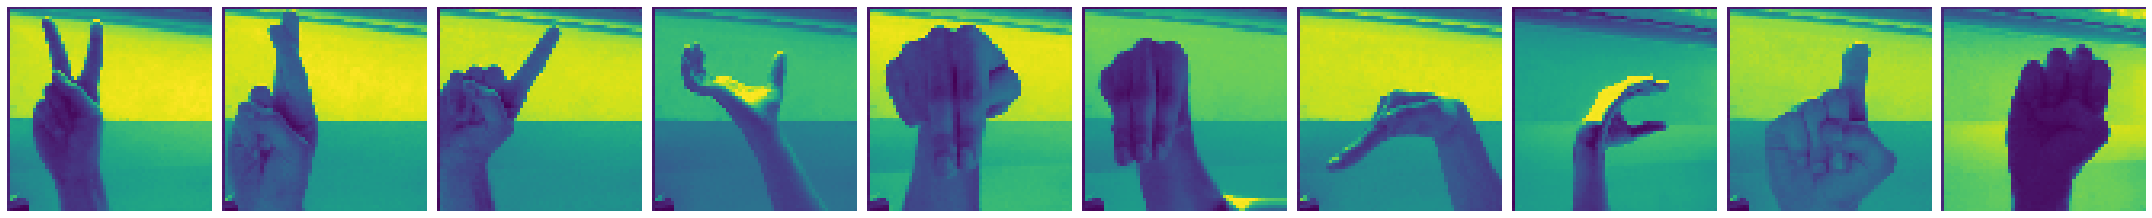

(10, 64, 64, 3)
K   R   Z   space   N   M   del   C   X   E   Epoch 1/5
290/290 [==============================] - 84s 290ms/step - loss: 1.9880 - accuracy: 0.4703 - val_loss: 1.1959 - val_accuracy: 0.6552
Epoch 2/5
290/290 [==============================] - 29s 100ms/step - loss: 0.3262 - accuracy: 0.9106 - val_loss: 0.6233 - val_accuracy: 0.8276
Epoch 3/5
290/290 [==============================] - 23s 81ms/step - loss: 0.0845 - accuracy: 0.9807 - val_loss: 0.0316 - val_accuracy: 0.9655
Epoch 4/5
290/290 [==============================] - 23s 80ms/step - loss: 0.0168 - accuracy: 0.9983 - val_loss: 0.0723 - val_accuracy: 0.9655
Epoch 5/5
290/290 [==============================] - 23s 79ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 2.8387 - val_accuracy: 0.9655
loss of 0.006879850290715694; accuracy of 100.0%
{'val_loss': [1.1958943605422974, 0.6232675909996033, 0.03164941444993019, 0.0722523033618927, 2.8386974334716797], 'val_accuracy': [0.6551724076271057, 0.8275862336158752,

['loss', 'accuracy']

In [3]:



#Plotting the images...
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


plotImages(imgs)
print(imgs.shape)
# print(labels)

word_dict = {0:'A',1:'B',2:'C',3:'D', 4:'E',5:'F',
             6:'G',7:'H',8:'I', 9:'J', 10:'K', 11:'L',12:'M',
            13:'N',14:'O',15:'P',16:'Q',17:'R',
             18:'S',19:'T',20:'U',21:'V',
            22:'W',23:'X',24:'Y',25:'Z',26:'del',27:'nothing',28:'space'}
for i in labels:
    print(word_dict[np.argmax(i)], end='   ')

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.2))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.3))
model.add(Dense(29,activation ="softmax"))


# In[23]:


model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')



model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0005)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')


history2 = model.fit(train_batches, epochs=10, callbacks=[reduce_lr, early_stop],  validation_data = test_batches)#, checkpoint])
imgs, labels = next(train_batches) # For getting next batch of imgs...

imgs, labels = next(test_batches) # For getting next batch of imgs...
scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')


#model.save('best_model_dataflair.h5')
model.save('best_model_dataflair3.h5')

print(history2.history)

imgs, labels = next(test_batches)

model = keras.models.load_model(r"best_model_dataflair3.h5")

scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

model.summary()

scores #[loss, accuracy] on test data...
model.metrics_names




predictions on a small set of test data:
K   B   F   L   H   R   V   D   O   G   

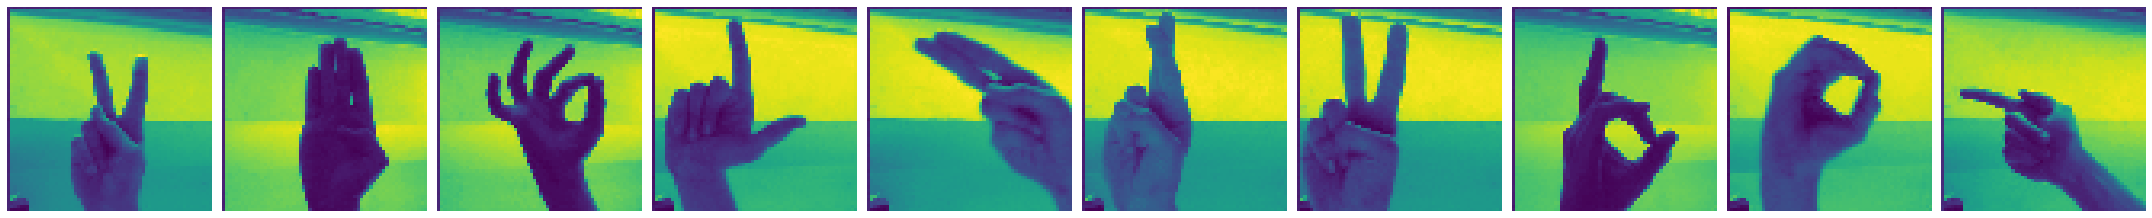

Actual labels:
K   B   F   L   H   R   V   D   O   G   

In [4]:
predictions = model.predict(imgs, verbose=0)


word_dict = {0:'A',1:'B',2:'C',3:'D', 4:'E',5:'F',
             6:'G',7:'H',8:'I', 9:'J', 10:'K', 11:'L',12:'M',
            13:'N',14:'O',15:'P',16:'Q',17:'R',
             18:'S',19:'T',20:'U',21:'V',
            22:'W',23:'X',24:'Y',25:'Z',26:'del',27:'nothing',28:'space'}

print("predictions on a small set of test data:")
for ind, i in enumerate(predictions):
    print(word_dict[np.argmax(i)], end='   ')

plotImages(imgs)

print('Actual labels:')
for i in labels:
    print(word_dict[np.argmax(i)], end='   ')

# print(imgs.shape)

# history2.history
